In [1]:
#LOAD MODS
try:
    import math as my
except ImportError as e:
    print(f'{e}')
except ModuleNotFoundError as e:
    print(f'{e}')
    
try:
    import pandas as pd
    print(f'Pandas {pd.__version__} loaded successfully')
except ImportError as e:
    print(f'{e}')
except ModuleNotFoundError as e:
    print(f'{e}')
    
try:
    import numpy as np
    print(f'Numpy {np.__version__} loaded successfully')
except ImportError as e:
    print(f'{e}')
except ModuleNotFoundError as e:
    print(f'{e}')
    
try:
    import xarray as xr
    print(f'Xarray {xr.__version__} loaded successfully')
except ImportError as e:
    print(f'{e}')
except ModuleNotFoundError as e:
    print(f'{e}')
    
try:
    import matplotlib as mat
    import matplotlib.pyplot as plt
    print(f'Matplotlib {mat.__version__} loaded successfully')
except ImportError as e:
    print(f'{e}')
except ModuleNotFoundError as e:
    print(f'{e}')

try:
    import calendar as cally
except ImportError as e:
    print(f'{e}')
except ModuleNotFoundError as e:
    print(f'{e}')    

try:
    import time as time
except ImportError as e:
    print(f'{e}')
except ModuleNotFoundError as e:
    print(f'{e}')

try:
    import scipy as sp
except ImportError as e:
    print(f'{e}')
except ModuleNotFoundError as e:
    print(f'{e}')
    
try:
    from datetime import timedelta
except ImportError as e:
    print(f'{e}')
except ModuleNotFoundError as e:
    print(f'{e}')
    
try:
    import regionmask as remy
    print(f'Regionmask {remy.__version__} loaded successfully')
except ImportError as e:
    print(f'{e}')
except ModuleNotFoundError as e:
    print(f'{e}')
    
import os
import sys
print(f" ################################ \n     Module loading complete! \n ################################")

Pandas 2.3.0 loaded successfully
Numpy 2.2.6 loaded successfully
Xarray 2025.7.0 loaded successfully
Matplotlib 3.10.3 loaded successfully
Regionmask 0.13.0 loaded successfully
 ################################ 
     Module loading complete! 
 ################################


In [5]:
#SUPPORT CELL 
global model, series, timestamp, now, tmax, tmin
model = input('What model is being used?  ')
series = input('Is this Historical or what SSP is this in?  ')

if series == 'Historical' or series == 'historical' :
    series = 'Historical'
    timestamp = range(1095,12045)
elif series == 'SSP585' or series == 'ssp585' :
    series = 'ssp585'
    now = input('Full or NearFuture or MidFuture or FarFuture? ')
else: 
    print('+++++++++++++++ \nIncorrect Input \n  Terminating\n+++++++++++++++')
    sys.exit()

if series == 'ssp585' and now == 'Full':
    timestamp = range(4014, 31390)
    year = '2026-2100'
elif series == 'ssp585' and now == 'NearFuture':
    timestamp = range(4015,11315)
    year = '2026-2046'
elif series == 'ssp585' and now == 'MidFuture':
    timestamp = range(15330,26645)
    year = '2047-2087'
elif series == 'ssp585' and now == 'FarFuture':
    timestamp = range(26645,31390)
    year = '2087-2100'
else:
    print('+++++++++++++++++++++++ \n Error in timestamping \n      Terminating \n+++++++++++++++++++++++')
    sys.exit()
    
maxpath = f'/mnt/nrdstor/dixon/mudby97/FWI_test/vardata/cmip6/{series}/tasmax/Downscaled_CMIP6_tasmax_Nebraska_{series}_{model}.nc'
minpath = f'/mnt/nrdstor/dixon/mudby97/FWI_test/vardata/cmip6/{series}/tas/Downscaled_CMIP6_tas_Nebraska_{series}_{model}.nc'

maxfile = xr.open_dataset(maxpath)
minfile = xr.open_dataset(minpath)

tmax = maxfile['tasmax'].sel(
    time=maxfile['time'][timestamp],
    lat=maxfile['lat'],
    lon=maxfile['lon'])

tmin = minfile['tas'].sel( 
    time=minfile['time'][timestamp],
    lat=minfile['lat'],
    lon=minfile['lon'])

print(tmax.shape)
print(tmin.shape)
print('++++++++++++++++++++ \n SUPPORT CELL READY \n++++++++++++++++++++')

What model is being used?  CESM2
Historical or what SSP is this?  ssp585
Full or NearFuture or MidFuture or FarFuture? NearFuture
(7300, 12, 36)
(7300, 12, 36)
++++++++++++++++++++ 
 SUPPORT CELL READY 
++++++++++++++++++++


In [11]:
#GROWING DEGREE CALC
#DICTIONARY - cx = ceiling / cn = floor
crop = input('What plant are you measuring for? ').lower()
if crop == 'corn' or crop == 'field corn' or crop == 'cow corn' :
    plant = 'zea mays'
    cx = 32.778
    cn = 10
elif crop == 'soybean' or crop == 'soy bean' or crop == 'soy' or crop == 'soya' or crop == 'soya bean' or crop == 'soyabean':
    plant = 'glycine max'
    cx = 30
    cn = 10
elif crop == 'sugarbeet' or crop == 'sugarbeets' or crop == 'sugar beet' or crop == 'sugar beets' or crop == 'sugar beat' or crop == 'sugar beats' or crop == 'sugarbeat' or crop == 'sugarbeats' :
    plant = 'the altissima cultivar of beta vulgaris'
    cx = 32.778
    cn = 10
elif crop == 'potato' or crop == 'potatos' or crop == 'potatoes' or crop == 'potatoe': 
    plant = 'solanum tuberosum'
    cx = 38
    cn = 4.444
elif crop == 'sorghum' or crop == 'sorgum' or crop == 'sogum' or crop == 'broomcorn' or crop == 'great millet' or crop == 'guinea corn' or crop == 'indian millet' or crop == 'jowar' :
    plant = 'sorghum bicolor'
    cx = 42
    cn = 10
elif crop == 'needleandthread' or 'needleandthread grass' or crop == 'needle and thread' or crop == 'needle and thread grass' or crop == 'stipa comata' or crop == 'needle thread grass' or crop == 'Hesperostipa comata' :
    plant = 'stipa comata'
    cx = 32.222
    cn = 0
elif crop == 'green needle grass' or crop == 'green needlegrass' or crop == 'greenneedle' or crop == 'greenneedle grass' or crop == 'stipa viridula' :
    plant = 'stipa viridula'
    cx = 23.889
    cn = 0
elif crop == 'columbia needle grass' or crop == 'columbia needlegrass' or crop == 'columbianeedle' or crop == 'columbia needle' or crop == 'colombia needle' or crop == 'columbia grass' or crop == 'stipa nelsonii' :
    plant = 'stipa nelsoni'
    cx = 32.222
    cn = 0
elif crop == 'western wheatgrass' or crop == 'west wheatgrass' or crop == 'western wheat grass' or crop == 'west wheat grass' or crop == 'agropyron smithii' :
    plant = 'agropyron smithii'
    cx = 32.222
    cn = 0
elif crop == 'bluebunch wheatgrass' or crop == 'bluebunch wheat grass' or crop == 'blue bunch wheatgrass' or crop == 'blue bunch wheat grass' or crop == 'blue bunch wheat' or crop == 'bluebunch wheat' or crop == 'agropyron spicatum' :
    plant = 'agropyron spicatum'
    cx = 32.222
    cn = 2    
elif crop == 'thickspike wheatgrass' or crop == 'thickspike wheat grass' or crop == 'thick spike wheatgrass' or crop == 'thick spike wheat grass' or crop == 'thickspike' or crop == 'thick spike' or crop == 'agropyron dasystachyum' :
    plant = 'agropyron dasystachyum'
    cx = 32.222
    cn = 0
elif crop == 'idaho fescue' or crop == 'idaho grass' or crop == 'idaho fescue grass' or crop == 'festuca idahoensis' :
    plant = 'festuca idahoensis'
    cx = 32.222
    cn = 0
elif crop == 'king spikefescue' or crop == 'kingspike fescue' or crop == 'king spike fescue' or crop == 'kingspike' or crop == 'king spike' or crop == 'leucopoa kingii' :
    plant = 'festuca idahoensis'
    cx = 32.222
    cn = 0
    #THE FOLLOWING ARE GENERIC NAME CATCH-ALLS
elif crop == 'needle grass' or crop == 'needlegrass' :
    print("Multiple species are identified as needle grass. Please use scientific name or specify common name. Terminating.")
    sys.exit()
elif crop == 'wheat grass' or crop == 'wheatgrass' :
    print("Multiple species are identified as wheat grass. Please use scientific name or specify common name. Terminating.")
    sys.exit()
    #FAILSTATE CATCH-ALL
else: 
    print('Crop not found. Please contact NSCO for adding to GDD Tool. \n           Terminating.')
    sys.exit()
print(f'Beginning the GDD calculation for {plant}.')

def GDD(TMAX, TMIN, CEILING, FLOOR):
    start_time = time.perf_counter()
    gdarray = xr.full_like(TMAX, fill_value = np.nan)
    for lat_idx in range(TMAX.shape[1]):
                for lon_idx in range(TMAX.shape[2]):
                    for time_idx in range(TMAX.shape[0]):
                        max_val = TMAX.isel(lat=lat_idx, lon=lon_idx,time=time_idx)
                        min_val = TMIN.isel(lat=lat_idx, lon=lon_idx,time=time_idx)
                        # TEMP CHECK 
                        # WE CANNOT USE EXTREMES
                        if max_val >= CEILING :
                            x = CEILING
                        else: x = max_val
                        if min_val <= FLOOR :
                            n = FLOOR
                        else: n = min_val
                        g = ((x+n)/2)- FLOOR                           #ACTUAL EQUATION
                        G = g.round(decimals=2)                        #ROUNDING TO HUNDREDTHS
                        if G <= 0 :                                    #CAN'T BE ZERO
                            G = 0
                        else: pass
                        gdarray.values[time_idx, lat_idx, lon_idx] = G #ADDS RESULT TO ARRAY
                check_time = timedelta(seconds=time.perf_counter() - start_time)
                print(f"Checkpoint: {lat_idx} at {check_time}")
    finalgd = gdarray.rename(f'gdd {plant}')
    finalgd.attrs["units"] = 'degree days'

    return finalgd

testrun = GDD(tmax, tmin, cx, cn)
print(testrun) 

What plant are you measuring for? corn
Beginning the GDD calculation for zea mays.
Checkpoint: 0 at 0:04:25.376251
Checkpoint: 1 at 0:09:50.516348
Checkpoint: 2 at 0:14:44.319229
Checkpoint: 3 at 0:21:40.282299
Checkpoint: 4 at 0:26:16.422716
Checkpoint: 5 at 0:31:46.830735
Checkpoint: 6 at 0:36:17.906681
Checkpoint: 7 at 0:43:32.251889
Checkpoint: 8 at 0:48:09.595887
Checkpoint: 9 at 0:52:17.636342
Checkpoint: 10 at 0:57:25.250274
Checkpoint: 11 at 1:02:36.677312
<xarray.DataArray 'gdd zea mays' (time: 7300, lat: 12, lon: 36)> Size: 13MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]

<xarray.DataArray 'gdd zea mays' (lat: 12, lon: 36)> Size: 2kB
array([[2947.1494, 2963.2563, 2965.4604, 2879.8457, 2874.419 , 2899.3289,
        2995.4666, 3055.6628, 3064.1978, 3046.4993, 3065.4453, 3093.7495,
        3110.4775, 3110.6416, 3134.074 , 3152.527 , 3167.5562, 3178.028 ,
        3136.855 , 3112.804 , 3117.0989, 3135.8484, 3160.5593, 3182.7314,
        3204.8962, 3224.9453, 3258.0535, 3265.5005, 3258.5852, 3272.1812,
        3215.523 , 3261.0852, 3301.1206, 3317.3047, 3316.9583, 3278.4272],
       [2883.604 , 2875.524 , 2952.4636, 2963.8105, 2861.979 , 2920.7417,
        2945.29  , 2995.6333, 3005.015 , 3005.3616, 3027.7668, 3043.066 ,
        3043.3442, 3047.2297, 3051.3777, 3075.4954, 3088.3796, 3066.3364,
        3027.354 , 3030.0332, 3040.2563, 3088.4734, 3122.4275, 3139.3364,
        3148.879 , 3165.3777, 3198.7664, 3219.3757, 3241.025 , 3211.0825,
        3223.186 , 3247.9126, 3280.391 , 3294.7695, 3247.8933, 3219.3657],
       [2779.685 , 2839.6177, 2895.9429, 2939.6

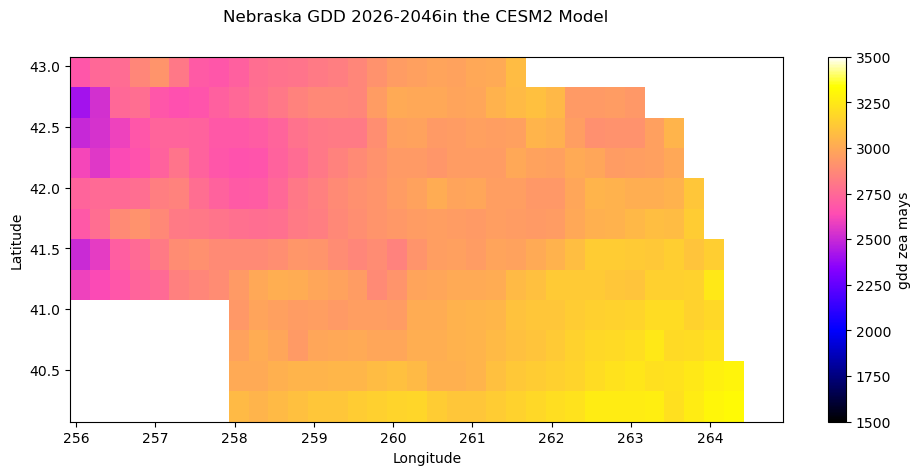

This took us about 0:00:00.641761


In [12]:
#TEST PRINT
start_average = time.perf_counter()

caltest = testrun.groupby('time.year').sum('time')

sumdata = caltest.mean(dim='year')
print(sumdata)

states = remy.defined_regions.natural_earth_v5_0_0.us_states_10  #DONT TOUCH! THE STATES_50 DOESNT WORK AND WILL BREAK IT 
mask = states.mask(sumdata.lon, sumdata.lat)
neb_idx = states.names.index('Nebraska')
neb_mask = sumdata.where(mask == neb_idx)
neb_mask = neb_mask.assign_coords() #(lon=sumdata['lon'],lat=sumdata['lat'])

im = neb_mask.plot(figsize=(11.5,4.74), cmap='gnuplot2', robust=False, add_colorbar=True, vmin=1500, vmax=3500)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.suptitle(f'Nebraska GDD {year}in the {model} Model', x=0.425)

plt.show()

end_average = timedelta(seconds=time.perf_counter() - start_average)
print(f'This took us about {end_average}')